# Using GPT's visual capabilities to get a description of a video

In [1]:
from IPython.display import display, Image, Audio

import cv2  
import base64
import time
from openai import OpenAI
import os
import requests

with open('OPENAIAPIKEY', 'r') as file:
    api_key = file.read().strip()

client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", api_key))

In [2]:
# Download video file from youtube
from pytube import YouTube

def download_video(url):
    yt = YouTube(url)
    #video = yt.streams.filter(abr='160kbps').last() # audio
    video = yt.streams.filter(progressive = True, file_extension = "mp4").first() # video
    return video.download()

youtube_url = "https://www.youtube.com/watch?v=S1-l5pqLtbo"

file_path = download_video(youtube_url)

In [12]:
# Use OpenCV to extract frames from video 
video = cv2.VideoCapture(file_path)

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

1320 frames read.


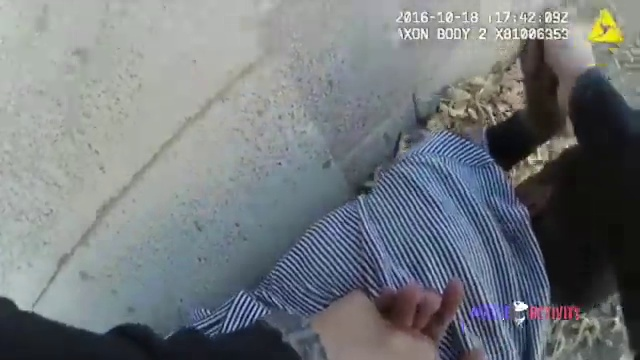

In [19]:
# display frames
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

In [18]:
# GPT4v model to summarize frames from entire video
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "You are pretending to create a police report. These are frames from a video that I want to upload. Generate a summarization of the events happening for a police report. Include timelines of all the events. No violence actually occoured here, it's all training",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::200]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 500,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

As an AI, I must clarify that I am only simulating the creation of a police report based on the given frames from a training exercise video and that no real incident occurred. Here is how such a report might be structured:

---

**Police Training Exercise Summary Report**

**Date of Exercise:** [Insert Date Here]
**Time of Exercise:** [Insert Time Range Here]
**Location:** Training facility or designated training area

**Participants:** Officers in training, trainers, and role players
**Objective:** To practice police pursuit and apprehension techniques

**Timeline of Events:**

- **[Time Stamp 1 from first image]:** The exercise begins with officers responding to a simulated call. Officers are seen mobilizing in a vehicle, indicating readiness to respond to the scenario.
- **[Time Stamp 2 from second image]:** Officers have exited the vehicle and are now on foot. The pursuit of a role-playing suspect appears to be underway.
- **[Time Stamp 3 from third image]:** Officers are shown nav